## Two Approaches to Parameter Estimation: Bayes vs. MLE

### Gabriel Gilling, Demian Gass

In [1]:
%%capture
#Install Plotly
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from matplotlib import pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots

# Introduction
Parameter estimation is a critical component of statistical inference, data science, and machine learning workflows. Though these topics can be complex and multifarious, they are all focused with the same thing: drawing accurate conclusions and predictions about unknown outcomes by modeling the relationship between different variables as precisely as possible. 
A parameter is a variable that governs the relationship between an input variable (sometimes also called a predictor or an independent variable) and an output variable (also know as an outcome or a dependent variable). We rarely have complete information, and thus we are forced to come up with ways in which we can understand the relationship between the information we do have access to (our predictor variables) and the information we are trying to predict (our outcome variable).

In this blog post, we're going to look at two different approaches to parameter estimation. We'll start with the Frequentist,or Classical approach using Maximum Likelihood Estimation (MLE) before moving on to discussing the Bayesian framework for parameter estimation. Our intention is not necessarily to argue in favor of one approach or another, but rather to demonstrate the difference in techniques and spark a more general discussion around statistical inference and what we are trying to accomplish as data scientists.


### Simulating the data
We'll center this discussion around the example of a coin-flip (as is mandatory of any statistics text). 

Specifically, we are interested in accurately predicting how often a coin will come up heads, or the probability that a coin will come up heads in a given flip. In this case, the outcome of our coin-flip is our random variable and it can take on the value of 0 (Tails) or 1 (Heads). 

The outcome of a single coin-flip then can be modeled as a Bernoulli random variable where $Y_{i}$ is the outcome of flip $i$ and 

$Y_{i}\sim Bernoulli(p)$

$p$ in this context is the probability of the coin coming up heads, and this is our parameter of interest, the parameter we would like to estimate.

As such, we have:

$P(\text{Y = 1 or Heads}) = p$

$P(\text{Y=0 or Tails}) = 1-p$

So, given a coin, how would we estimate $p$? 
For now, we aren't going to give you any information about this coin, and we'll discuss later on why this is important. For now though, we'll want to come up with ways in which we can get more information about $p$, we need to observe some data! In this case, we'll obtain data by, well, flipping the coin. We could just flip the coin once but this wouldn't be very informative. Imagine that the truth is that $p=0.5$ and after one flip we observe a head. 
If we only relied on that one flip for our information, we might conclude that $p=1$ (in fact this is the answer that the Frequentist approach would give us). What we'll want to do instead is observe a lot of flips.

Suppose that we conduct $n$ independent coin-flips, where each coin-flip is of course a Bernoulli random variable. Of those $n$ flips, the total number of heads, $X$, is a binomial random variable with parameters $n$ and $p$. 

Formally, we have:

$X\sim Binomial(n, p)$

Thus, modeling the outcome of Bernoulli trials repeated $n$ times follows a Binomial distribution. By flipping the coin over and over again, we'll be able to gain more and more information about our paramter of interest, $p$. Parameters are unknowable in practice, but we can work with their approximations.

### Simulating Data
Let's assume we have a biased coin that has a 60% probability of flipping heads, and we want to estimate that probability. 

As we've seen, the Bernoulli distribution allows us to work with variables that have a binary (0 or 1) outcome. All we need to do is pass in a probability of success (of returning 1, or in our case of flipping heads). Repeating this Bernoulli trial N times is like flipping a coin N times, and observing whether the coin came up heads (1) or tails (0). 

We can use the `scipy.stats` library to draw outcomes from the Binomial distribution. 

Simulations are very useful because we can hard-code the "true" parameters, which then allows us compare how different frameworks compare in approximating the parameter.

In [3]:
import numpy as np
import scipy.stats as stats

np.random.seed(42) # set seed for reproducability 

# Set the probability of heads = 0.6
p = 0.6

# Flip the Coin 10000 times and observe the results
n_trials = 10000
data = stats.bernoulli.rvs(p, size = n_trials)

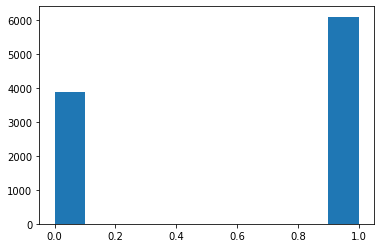

In [4]:
from matplotlib import pyplot as plt
plt.hist(data)
plt.show()

In [5]:
sum(data)

6108

As expected, the split between heads and tails is close to 60/40, and that's simply because we've coded the parameter that way!

Now that we have our data, let's compare how the Frequentist and Bayesian approaches obtain the parameter of interest: $p$.

## Frequentist Approach

Frequentist statistics uses a technique known as Maximum Likelihood. While a full treatment of MLE is outside the scope of this blog post, its working is in its name: it fits a model that maximizes the likelihood of having observed the data. In elementary regression analysis for instance, this is akin to drawing a line that fits the data as closely as possible. 

For the Binomial distribution, the MLE is the sample proportion of success.$^{1}$

$\text{MLE} = \frac{\text{Number of successes}}{\text{Number of trials}}$

We can also calculate the standard error of the estimate. Recall that we never can know the true parameter, we can only approximate it as best we can. As such, quantifying uncertainty in the predictions we're making is a fundamental part of parameter estimation, and as we'll see is also a defining factor in the differences in workflows between Bayesian and Frequentists approaches.

A Binomial distribution's standard deviation is $\sqrt{p*(1-p)}$

As such the standard error is simply the standard deviation scaled by $\sqrt{N}$. So S.E. =  $\sqrt{\frac{p*(1-p)}{N}}$

We can find our 95% confidence intervals simply by multiplying the standard error with the 95% Z-stat, which is equal to 1.96.

$\text{S.D} = \sqrt{p*(1-p)}$

$\text{S.E.} =  \sqrt{\frac{p*(1-p)}{N}}$

$\text{C.I Bounds} = \text{MLE} \pm 1.96*\text{S.E.}$

$^{1}$https://online.stat.psu.edu/stat504/lesson/1/1.5

Let's look at what happens when we perform a single coin toss.

In [6]:
N = 1
sample = data[:N]
sample

array([1])

In [7]:
p_estimated = np.mean(sample)
q_estimated = 1 - p_estimated

standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(N)

In [8]:
p_estimated # MLE estimate

standard_error 

0.0

In [6]:
full_results = []
i = 10
results = {}
sample = data[:i]
results['size'] = i
p_estimated = np.mean(sample)
results['number_of_heads'] = sample.sum()
results['p_estimated'] = p_estimated

q_estimated = 1 - p_estimated

results['q_estimated'] = q_estimated

standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)

results['standard_error'] = standard_error

ci = 1.96*standard_error

results['low'] = p_estimated - ci
results['high'] = p_estimated + ci

full_results.append(results)

In [7]:
results

{'size': 10,
 'number_of_heads': 5,
 'p_estimated': 0.5,
 'q_estimated': 0.5,
 'standard_error': 0.15811388300841897,
 'low': 0.19009678930349883,
 'high': 0.8099032106965012}

In [23]:
sample

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

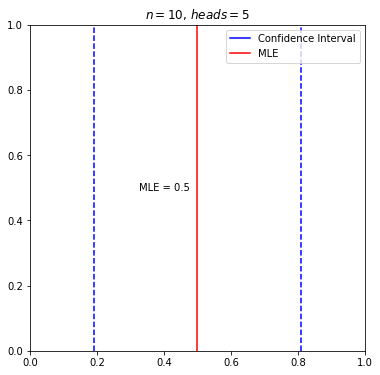

In [28]:
import matplotlib.lines as mlines

fig, axs = plt.subplots(figsize = (6,6))

axs.axvline(results['p_estimated'], color = 'red')
axs.axvline(results['low'], color = 'blue', linestyle='dashed')
axs.axvline(results['high'], color = 'blue', linestyle='dashed')
axs.title.set_text("$ n = $" + str(results['size']) + ", $heads = $" + str(results['number_of_heads']))
axs.text(results['p_estimated'] - 0.1, 0.5, 'MLE = ' + str(np.round(results['p_estimated'], 2)), 

horizontalalignment='center', verticalalignment='center', transform=axs.transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')

axs.legend(handles = [blue_line, red_line], loc=1);


In [56]:
def plot_single_df(df, title):
    y = [col for col in df.columns if col != 'Theta'][0]

    fig = px.scatter(df, x = 'Theta', y = y, title = title, labels = {'Theta':'Theta - Probability of Heads'})

    for i, theta in enumerate(df.Theta):
        fig.add_shape(type = 'line', x0 = theta, x1 = theta, y0 = 0, y1 = df[y][i])

    fig.update_layout(
            margin=dict(l=20, r=20, t=25, b=20),
            xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 0.1),
            width = 750, height = 600,
    template = 'plotly_white')
      
    return fig

$L(p|n, y) = {n \choose y} p^y(1-p)^{n-y} $

#### Create Multi Plot

In [74]:
def make_multi_plot(n, heads, prior_df):
    likelihood = create_likelihood_df(n, heads, prior_df)

    posterior = create_posterior_df(likelihood, prior_df)

    
    plot_single_df(prior_df, "Prior Distribution")
    plot_single_df(likelihood, "Likelihood Distribution (n = " + str(n) + ", heads = " + str(heads) + ")" )
    plot_single_df(posterior, "Posterior Distribution")


In [32]:
#Iterate through results to only look at 10 flips at a time
full_results = []
steps = [1, 10, 25, 50, 100, 500, 1000, 5000, 7500, 10000]

for i in steps:
    results = {}
    sample = data[:i]
    results['size'] = i
    p_estimated = np.mean(sample)
    results['number_of_heads'] = sample.sum()
    results['p_estimated'] = p_estimated

    q_estimated = 1 - p_estimated

    results['q_estimated'] = q_estimated

    standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)

    results['standard_error'] = standard_error

    ci = 1.96*standard_error

    results['low'] = p_estimated - ci
    results['high'] = p_estimated + ci

    full_results.append(results)


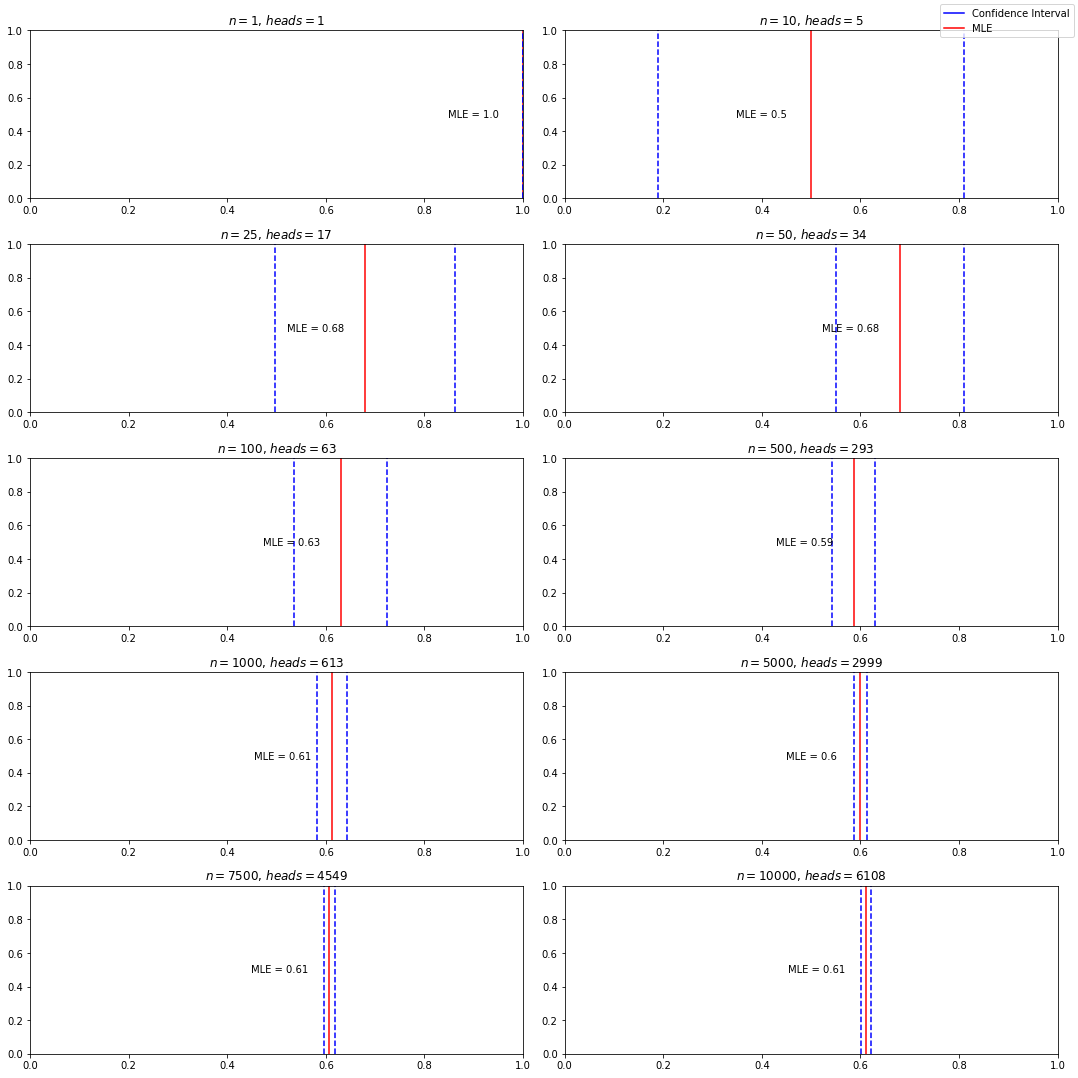

In [34]:
import matplotlib.lines as mlines

figs,axs = plt.subplots(5, 2, figsize=(15,15))

axes = [(0,0),(0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1)]

for i,sample in enumerate(full_results):
    axs[axes[i]].axvline(sample['p_estimated'], color = 'red')
    axs[axes[i]].axvline(sample['low'], color = 'blue', linestyle='dashed')
    axs[axes[i]].axvline(sample['high'], color = 'blue', linestyle='dashed')
    axs[axes[i]].title.set_text("$ n = $" + str(sample['size']) + ", $heads = $" + str(sample['number_of_heads']))
    axs[axes[i]].text(sample['p_estimated'] - 0.1, 0.5, 'MLE = ' + str(np.round(sample['p_estimated'], 2)), 
    horizontalalignment='center', verticalalignment='center', transform=axs[axes[i]].transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')

figs.legend(handles = [blue_line, red_line], loc=1)
figs.tight_layout()

In [37]:
figs.savefig('flips.png')

#### Should we have a y-axis on the plots above or should it just be blank?

In the plots above, we take snapshots of our flip results after 1 flip, 10 flips, 25 flips, and so on up to 10,000 flips. Within each snapshot, we plot our Maximum Likelihood Estimate using our data up until that point, that is the red line each plot (note that this is always simply the proportion of heads to total number of flips). In addition to the MLE, we've also plotted our 95% confidence interval for our estimate, this is represented by the two dotted blue lines. These plots give us an idea of how our estimates, and our confidence in those estimates, change as we flip the coin a repeated number of times.

As we continue to flip the coin over and over again, we gain more and more information about that coin's behavior. As a result, we should expect our estimates to become more and more precise, as well as more accurate. When we've only flipped the coin a couple of times (say 1 to 100 times), we can see that our confidence interval is quite wide. This is because we simply haven't seen enough information to rule out the likelihood that the true probability of heads lies somewhere to the sides of our current MLE. However, as we continue the flip the coin and observe more and more evidence about our parameter of interest, we see our confidence interval starting to narrow and hug the MLE. By the time we've flipped the coin 10,000 times, our condifence interval is only slightly to the side of our MLE. Let's think about this intuitively: as we begin to gain an overwhelming amount of evidence, we should become increasingly confident in our estimates. Additionally, and most important, we should expect our estimate to get closer and closer to the truth! This is the law of large numbers: as the size of a sample increase, its parameter estimand gets closer to the true value of the whole population. This is confirmed by the knowledge that we set the true probability of heads to 0.6, and indeed our MLE estimate after just 1,000 flips is 0.61 and it does not waver after this (only the confidence interval narrows).

## Bayesian Approach

### Steps to the Bayesian Process:  
**1. Specify prior distributions over the parameters of your probabilistic model (prior)**     
**2. Identify the observed data you are working with.**   
**3. Construct a probabilistic model to represent the data (likelihood).**   
**4. Collect data and apply Bayes’ rule to re-allocate credibility across the possible parameter values (posterior).**   

The first step of the Bayesian workflow is specifying what our prior beliefs are about the outcome variable. For this example, this means encoding our beliefs about the probability that a coin flip comes up heads. 

In [131]:
# helper functions
def plot_distribution(df, title: str):
    plt.scatter(df.iloc[:,0], df.iloc[:,1], color = 'blue')
    for i in range(len(df)):       
        plt.vlines(x = df.iloc[:i,0], color = 'blue', ymin = 0, ymax = df.iloc[:i,1])
    
    plt.title(title)

### Step 1: Specify Prior Distributions

In [38]:
def create_prior_df():
    """
    Returns a dataframe containing the parameter and its corresponding prior probability
    """

    theta_values = list(np.linspace(0,1,11))

    vals_pmin = np.minimum(np.linspace(0,1,11), np.linspace(1,0,11))

    theta_probabilities = vals_pmin/sum(vals_pmin)

    prior = pd.DataFrame(list(zip(theta_values, theta_probabilities)), columns = ("Theta", "Probability"))

    return prior

$Y_{i}\sim Bernoulli(p)$
$X\sim Binomial(N,p)$

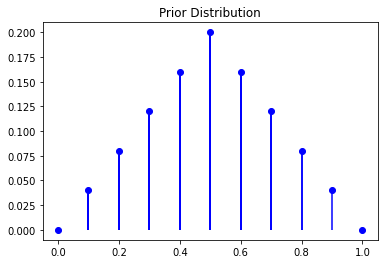

In [132]:
prior_distribution_df = create_prior_df()
plot_distribution(prior_distribution_df, title = "Prior Distribution")

In [133]:
# new_priors = [0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05]

# theta_values = list(np.linspace(0,1,11))
# new_prior_df = pd.DataFrame(list(zip(theta_values, new_priors)), columns = ("Theta", "Probability"),)

### Step 2 & 3: Identify/Collect Data and Build a Likelihood Distribution

#### Create Likelihood Distribution

In [137]:
def create_likelihood_df(n, heads, prior_df):
    """
    Create a Binomial likelihood probability distribution dataframe 

    Parameters
    ----------
    n : The number of coin iid coin flips
    heads : The number of heads in n flips
    prior_df -  Dataframe containing a vector of theta values for the binomial distribution
    """

    likelihood_vals = stats.binom.pmf(heads, n, prior_df.Theta)
    
    likelihood_df = pd.DataFrame(list(zip( prior_df.Theta, likelihood_vals)), columns=('Theta', 'Likelihood'))

    return likelihood_df


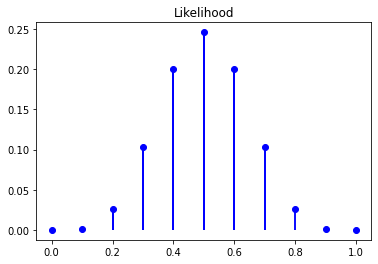

In [138]:
likelihood_df = create_likelihood_df(10, 5, prior_distribution_df)
plot_distribution(likelihood_df, title = "Likelihood")

#### Create Posterior Distribution

In [142]:
def create_posterior_df(likelihood_df, prior_distribution_df):
    """
    Creates a dataframe posterior probability distribution dataframe
    Parameters
    ----------
    likelihood_df : Likelihood dsitribution dataframe from create_likelihood_df()
    prior_distribution_df : Prior probability distribution dataframe from create_prior_df()
    """
    # calculate denominator
    marginal_likelihood_sum = (likelihood_df.Likelihood * prior_distribution_df.Probability).sum()
    # divide joint distribution by denominator
    posterior_prob = (likelihood_df.Likelihood * prior_distribution_df.Probability)/marginal_likelihood_sum

    posterior_distribution_df = pd.DataFrame(list(zip(prior_distribution_df.Theta , posterior_prob)), columns=('Theta', 'Posterior'))

    return posterior_distribution_df


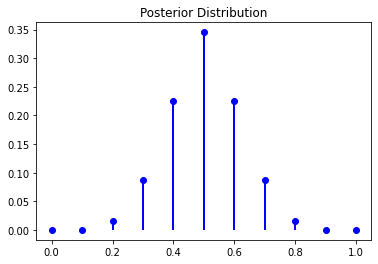

In [144]:
posterior_distribution_df = create_posterior_df(likelihood_df, prior_distribution_df)
plot_distribution(posterior_distribution_df, title = "Posterior Distribution")

So what is the posterior distribution? It is a reflection of our beliefs about our parameter of interest, having incorporated all of the information we have access to. It is the product of two components: our prior beliefs about theta, and the likelihood, or the evidence, which reflects the information we gained from the observed data. In combining these two pieces, we obtain a probability distribution for our parameter of interest. This is key piece seperating the Bayesian and Frequentist approach. In the frequentist methodology, our answer is expressed in the form of a point estimate (with a confidence interval). In the bayesian methodology however, our answer is expressed in the form of a probability distribution, allowing us to place a value on the probability of each potential value of theta being correct. This is powerful because it is a much more sound approach to encoding the uncertainty of our beliefs, and it further allows us to view outcomes as being drawn from a probability space, rather than being a single point estimate. 

In the case above, after having observed 10 flips and 5 heads, our prior distribution has been squeezed by the likelihood towards theta = 0.5, as seems to increasingly be the most likely answer. However, we haven't seen enough information to rule out the possibility that theta lies somewhere to the side of 0.5, so we will continue to observe more data. Similar to how we did in the frequentist discussion, let's see how our bayesian conclusion changes as we see more and more data.

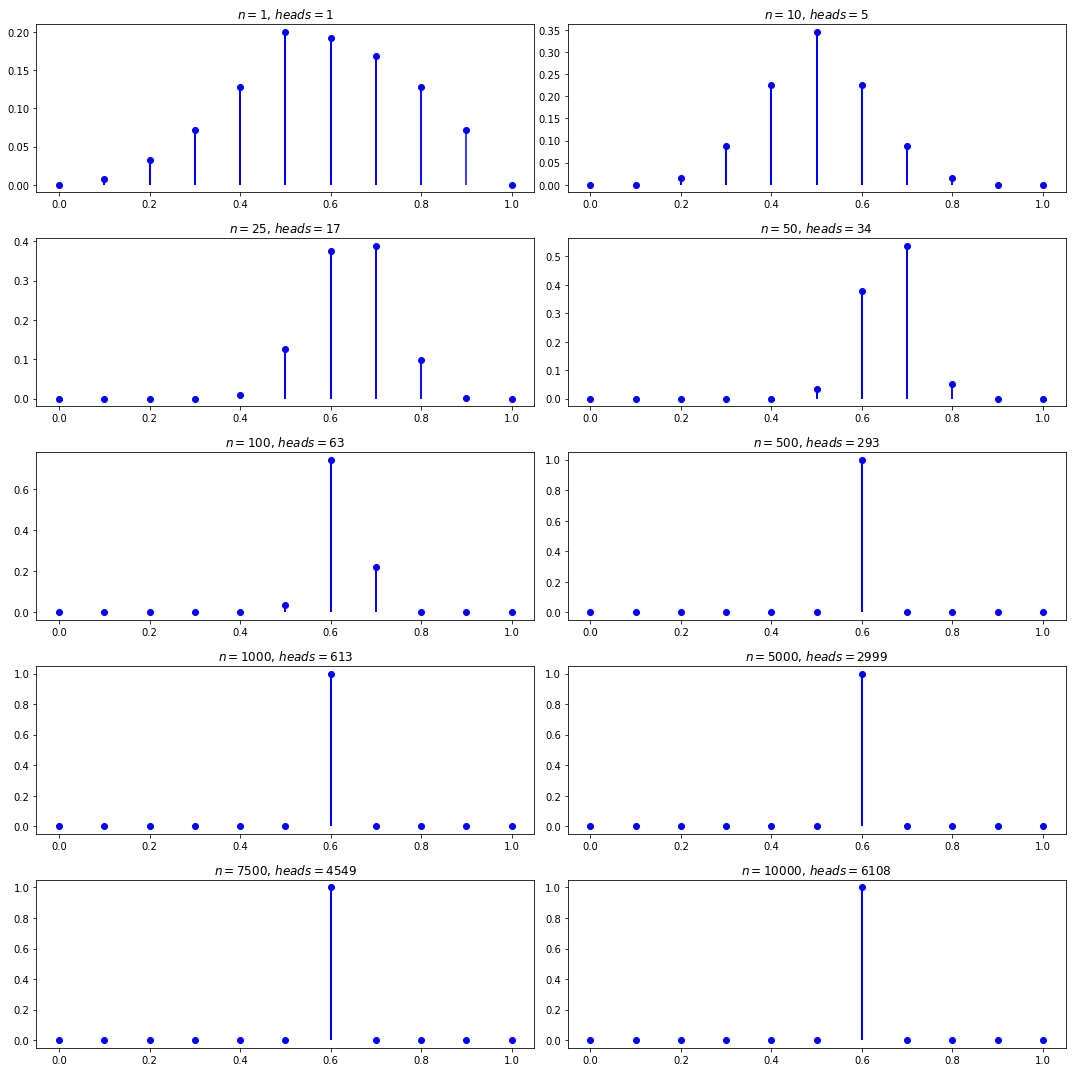

In [161]:
steps = [1, 10, 25, 50, 100, 500, 1000, 5000, 7500, 10000]

fig, ax = plt.subplots(5,2, figsize = (15,15))
axes = [(0,0),(0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1)]

for i in range(len(steps)): 
    trials = steps[i]
    num_heads = sum(data[:steps[i]])
    likelihood_df = create_likelihood_df(trials, num_heads, prior_distribution_df)
    posterior_distribution_df = create_posterior_df(likelihood_df, prior_distribution_df)
    # figs.append(plot_single_df(create_posterior_df(likelihood_df, prior_distribution_df), title = "Posterior Distribution"))
    ax[axes[i]].scatter(posterior_distribution_df.iloc[:,0], posterior_distribution_df.iloc[:,1], color = 'blue')
    ax[axes[i]].title.set_text("$ n = $" + str(trials) + ", $heads = $" + str(num_heads))
    for j in range(len(posterior_distribution_df)): 
        # print(posterior_distribution_df.iloc[:j,0])
      
        ax[axes[i]].vlines(x = posterior_distribution_df.iloc[:j,0], color = 'blue', ymin = 0, ymax = posterior_distribution_df.iloc[:j,1])
    
fig.tight_layout()
    
    # plt.title(title)



Let's start off by analyzing the situation in which we've flipped the coin a single time and observed heads. In the frequentist approach, we saw that, in this scenario, our estimate of theta would have been theta = 1, an obviously incorrect conclusion, and yet we had no other way to answer the question. In the bayesian world, our answer is very different. Because we defined our prior beliefs to say that the most likely value of theta is 0.5, we are only slightly swayed by that first flip. Think about this intuitively, if you really believed that a coin was fair, and you flipped it once and it came up heads, would that be enough evidence to convince you that the coin isn't fair? Probably not, and such is the way with the Bayesian answer. What we'll begin to shower in later articles, is that the Bayesian approach performs much better than the frequentist approach when there is very little data to work with. The viability of the frequentist answer relies on the law of large numbers, and thus when we do not have a large amount of data, the results aren't always great.

However, as we begin to observe more and more data, more flips of the coin, we start to see our bayesian answer become quite unidimensional, and eventually we're placing all of our eggs in the theta = 0.6 basket. After really just 100 flips, we are assinging a very small probability to theta values which don't equal 0.6, and eventually the probability we assign to 0.6 is 1, or 100%. What is happening in the background, is the likelihood (or the observed data), is beginning to dominate the prior beliefs we established at the beginning. This is because the evidence is just overwhelming, and so we want to rely more and more on that. Again, imagine that you are flipping a coin and originally thought that the coin was fair (theta = 0.5). What if you flipped that coin 100 times and observed 100 heads, would you still think that the coin is fair? No! You would most certainly start to believe that the coin is very biased, and that the true probability of heads is closer to 100%. Such is the way of the bayesian approach: as our quanitity of information steadily increases, we'll begin to relly more heavily on that evidence, and pay a little less attention to what we believed initiall
If we recall the plots we showed for the frequentist approach, we realize that the bayesian and frequentist answers are agreeing with each other, and this is as it should be! As we gain fuller information about our parameter of interest (i.e observe more data), our answers should become more obnjective. We can imagine that in a world of full information -- where every detail of what is occuring in the world is known to us -- statistical inference becomes objective. We only have the need for these fancy estimation techniques because we live in a world where we never have full information, there are always unknowns. 


In [163]:
fig.savefig("posteriors.png")

In [96]:
figs[0]

In [95]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(figs[0].data, row = 1, col = 1)
fig.add_trace(figs[1].data, row = 1, col = 2)

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [(Scatter({
    'hovertemplate': 'Theta - Probability of Heads=%{x}<br>Posterior=%{y}<extra></extra>',
    'legendgroup': '',
    'marker': {'color': '#636efa', 'symbol': 'circle'},
    'mode': 'markers',
    'name': '',
    'orientation': 'v',
    'showlegend': False,
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
    'xaxis': 'x',
    'y': array([0.   , 0.008, 0.032, 0.072, 0.128, 0.2  , 0.192, 0.168, 0.128, 0.072,
                0.   ]),
    'yaxis': 'y'
}),)]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

### What happens with more data?

#### n = 10

In [77]:
n = 10
heads = data[:10].sum()
make_multi_plot(n,heads,prior_distribution_df)

#### n = 25

In [17]:
n = 25
heads = data[:n].sum()
make_multi_plot(n,heads,prior_distribution_df)

#### n = 50

In [18]:
n = 50
heads = data[:n].sum()
make_multi_plot(n,heads,prior_distribution_df)

#### n = 100

In [19]:
n = 100
heads = data[:n].sum()
make_multi_plot(n,heads,prior_distribution_df)

#### As n gets larger and larger, the data (the likelihood) becomes more and more overwhelming. With weak prior beliefs, our posterior beliefs become overwhelmed by the new evidence.


# TODO: Explain why the posterior for coin flip probabilities was conjugate

### Updated Conclusion: 
- I took what you wrote in Medium, copied it here, and made changes accordingly

In this first blog post, we’ve looked at two different ways of estimating unknown parameters. Under the Frequentist approach, we let the data do the talking: we estimate the relationship between X and Y by building a model that fits the observed data as closely as possible. This gives us a single point estimate, the Maximum Likelihood Estimate, and uncertainty is captured by the model’s standard error which is inversely proportional to the sample size. As such, a typical Frequentist endeavor is to collect as much data as possible about the parameter of interest in order to reach a more accurate estimate (in theory, at least).

Under the Bayesian approach, we begin our analysis with an idea of what the relationship between our variables is: the prior distribution. We then observe our data and update our beliefs about the parameter’s distribution: this gives us the posterior distribution. An important but subtle difference under the Bayesian framework is that we treat parameters as random variables in order to capture the uncertainty about their true values. This entails working with distributions at every stage of the modeling process.

If we recall the plots we showed for the Frequentist approach, we realize that the Bayesian and Frequentist answers agree with each other as the sample size increases, and this is as it should be! As we gain fuller information about our parameter of interest (i.e observe more data), our answers should become more objective.

So you might wonder, what’s the point of having different approaches if they end up giving the same answers? It depends on the use case really. We would argue that in cases where you have lots and lots of data, then deploying a fully fledged Bayesian framework might be overkill. In cases in which you have less data, as is often the case in the social sciences for instance, then the ability to work with posterior distributions can be very insightful. Additionally, in the frequentist approach, we are entirely at the mercy of our data's accuracy. If our data isn't accurate or is skewed, then our estimate will be so as well. In the Bayesian approach, we can offset this effect by setting stronger priors (i.e. being more confident in our prior beliefs). We also argue that what Bayesian analysis lacks in simplicity it makes up in overall precision and there are many scenarios in which presenting a posterior distribution to a client or colleague can be much more informative than a point estimate.

In this blog post, we’ve treated the prior space as relatively simple, with only 11 arbitrary values p could take on. But what if p could take on any possible value between 0 and 1? When we start working with continuous distributions for parameter spaces things get a bit dicier, and this will be the topic of the next blog post, where we’ll look at why Markov Chain Monte Carlo approximations are used — stay tuned!

Trying to boil this conclusion down to bullet points:
- The frequentist approach estimates the unknown parameter using the Maximum Likelihood Estimate (MLE): the point estimate which is the most likely true value of the parameter, given the data that we've observed. 
- The frequentist answer is completely formed from the observed data and is delivered in the form of a single point estimate. This puts us at the mercy of the data's accuracy and quality.
- The bayesian approach combines a prior probability distribution with observed data (in the form of a likelihood distribution) to obtain a posterior probability distribution. 
- While the bayesian approach also relies on data, its estimate incorporates our prior *knowledge* about the parameter of interest, its answer is delivered in the form of the PoI's probability distribution. We can offset our reliance on the data by setting stronger priors.
- Both the frequentist and bayesian estimates begin to equal each other as our sample size grows and the statistical inference becomes objective.


### Likelihood Discussion:
The likelihood can be a complicated concept to grasp, but what it does is essentially return a number that tells us how well a certain value of p fits the data. In other words, the observed data supports one statistical hypothesis (i.e. parameter value) better than another if the likelihood of the first hypothesis exceeds the likelihood of the second hypothesis. High likelihood values for a set of p means that they “fit” the data well, and vice-versa. We are basically asking: for any given p, can we be confident that it actually generated the data we witnessed?

Likelihood is not a probability, but it is proportional to one: The likelihood of a parameter estimate given some data is proportional to the the probability of obtaining that data given that the parameter estimate is true, multiplied by an arbitrary positive constant. If you flip a coin 1000 times and observe 900 heads, the likelihood that p = 0.9 will be greater than the likelihood that p = 0.1. We want to evaluate the likelihood for each value in the parameter space, we want the likelihood function. This will let us compare the likelihoods of each estimate, and only in comparing likelihoods do we find meaning.

In the frequentist approach, we want to choose the parameter estimate which best explains the observed data. We can obtain this estimate by selecting the parameter value with the larges likelihood value, also known as the Maximum Likelihood Estimate (MLE). The way in which we solve for the MLE depends on the problem, but in this case the MLE for the probability of heads is simply the ratio of heads to total flips: MLE = heads/flips 

### Likelihood Step of Bayes Approach:
Now that we have defined and encoded our prior beliefs, the next step of the Bayesian approach is to collect data and incorporate it into our estimates. This step is no different than what we did in the frequentist approach: we'll observe the exact same data and again use the likelihood function to extract information about our parameter space from the data. The only difference is that we now aren't simply after just the MLE, or the point estimate that we concluded with in the frequentist approach, we need the likelihood value for each value in the parameter space. 


***CONSIDER PUTTING THIS BOTTOM DISCUSSION OF BINOMIAL LIKELIHOOD UP ABOVE WHEN WE DISCUSS MLE AS PART OF THE FREQUENTIST APPROACH***
In this example we are using a binomial likelihood because our coin flips only have 2 possible outcomes. We could theoretically use a Gaussian likelihood if we believed our outcome variable to be normally distributed, but it wouldn’t make much sense in this case! The equation for the binomial likelihood is its Probability Mass Function (PMF) [3].

Binomial Likelihood Function
Let’s unpack the equation above. We are saying: given n tosses and y heads, what is the likelihood associated with p? For each value of p in θ, the likelihood evaluates the probability of that p value. As an example, if we’ve observed 1 heads, then the likelihood of p= 0 must be 0 — since we’ve observed at least 1 heads, then the likelihood of NEVER flipping heads has to be 0. Another example, albeit an unlikely one (see what I did there?) would be witnessing 10 heads out of 10 flips. In that case, the likelihood would gauge a value of p = 1 to be extremely likely and would likely assign it a probability close to 100%.
Let’s now compute the likelihood and visualize it. We’ll keep the same first 10 data points from the previous example, so we have 5 heads out of 10 flips.


Likelihood after observing 5 heads from 10 coin flips
You’ll notice that the likelihood is peaked around 0.5, with values further away from it getting increasingly smaller. That makes sense: the likelihood has updated our prior beliefs about θ with the data, which have shown that for 5 out of 10 flips were heads — given the data we’ve observed, the most likely true value of theta is 0.5. Thus 0.5 will get the highest likelihood. Vice-versa, values such as 0.1 and 0.9 are very unlikely to be the true value, and we see that reflected in the chart accordingly. In turn, values at the extremes are not corroborated by the data, and are consequently given very small likelihood values.
It is important to note however, that the likelihood is not a valid probability distribution. You can check that yourself by summing all of the probabilities for θ, the result does not add to 1! That’s where the normalizing constant / denominator comes in: dividing each likelihood probabilities by the normalizing constant (which is a scalar) yields a valid probability distribution that we call the posterior.


### Random Variables Discussion / Introduction

Whether it be an outcome that is yet to occur, or a reality that we cannot glimpse, we are obsessed with knowing the unknown. We spend immense resources in hopes of producing more accurate predictions of the future, and relish those whose forecasts consistently get it right. Over the past century, the burgeoning field of statistical inference has presented a more robust toolset for modeling these unknowable outcomes and relationships. The aim of statistical inference is to use observable data to infer the properties of a random variable (RV). Random variables can be a foggy term for many, but essentially they are unknown outcomes, values which are determined/produced by an underlying distribution of probability (at least, that is how we model their behavior). 

In this blog post, we’ll be working with one of the simplest RVs out there, the outcome of a coin flip, in order to understand a fundamental aspect of inference called parameter estimation.
While a coin is a simple RV because it can take on two values- heads or tails, you can think of other RVs such as dice rolls — which can take 6 values in the case of a 6-sided die, or stock prices — which can theoretically take on any positive value.
In statistical inference, we want to understand the relationship between RVs in order to understand and make predictions about the world around us. The entity that governs the relationship between different RVs is called a parameter, and is often denoted with the Greek letter θ (theta). We can write that relationship mathematically in the following way:

Y is our dependent (or outcome) variable and X is our independent (or predictor) variable. θ is the parameter space, which encompasses all of the potential values that govern the relationship between Y and X.
Although the true value of a parameter is by definition unknown, we can work with its approximation. In this blog post, we’re going to look at two different approaches to doing so. We’ll start with the Frequentist - or Classical approach- which uses Maximum Likelihood Estimation (MLE) and then we’ll move on to the Bayesian framework. But before, let’s briefly discuss the Binomial Distribution, a relatively simple but nonetheless invaluable distribution that every data scientist should know about, and how to simulate it by writing Python code.